# HR Analytics Project- Understanding the Attrition in HR

##### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

##### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

##### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

##### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

##### Note: You can find the dataset in the link below.

# Importing the libraries

In [82]:
! pip install autoviz -q
! pip install tabulate -q

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset


In [1]:

df = pd.read_csv("D:/hr_analytics_dataset.csv")
df.head()

<IPython.core.display.Javascript object>

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Shape of the dataset

The dataset appears to have a total of 1470 rows and 35 columns including 1 target column

In [85]:
df.shape

(1470, 35)

In [86]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Preporcessing

### The dataset appears to have all the information intact and as 30 non null out of 30 rows.



### The columns "Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18" and "OverTime" have object data type which also has target variable and the remaining features have int data type
#### We can also see at the file size of this dataset which is 402.1 + KB in this case

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Lets plot a heatmap to identify if any null values

#### We don't have any null / misisng values in anay columns

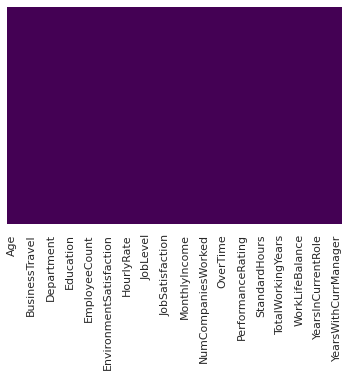

In [88]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

In [89]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Lets plot a couple of plots for further understanding

#### The below graph shows us the Attrition rate of all the employess

#### We can see that the Attrition rate is very less compared to retention rate. 

#### We have roughly about 220 that fall under "Yes" category and over 1200 under "No" category.

#### This also suggests the majority of the employees have some personal goals set for themselves and it may be getting fulfilled hence they are still woking at the same company.

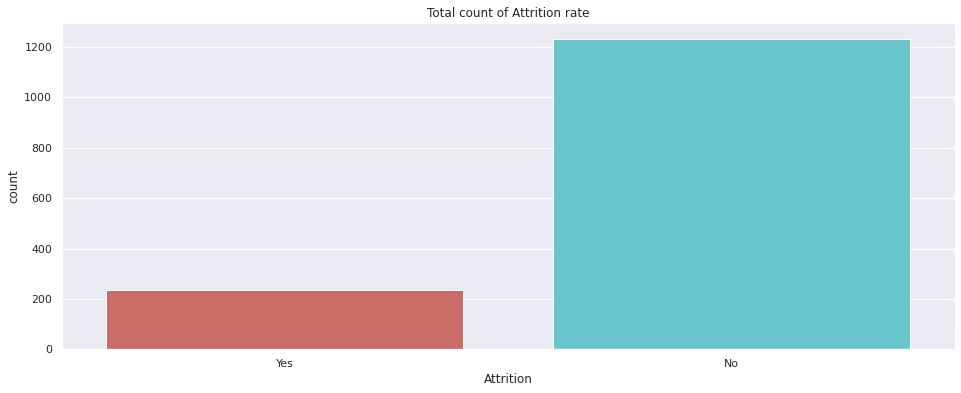

In [90]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Attrition", data=df, palette="hls").set(title='Total count of Attrition rate')

#### Lets now compare the rate of Attrition amongst the gender

#### In this scenario, itappears Female employees are less likeley to remain in the organization compared to Male employees.

#### There can be multiple amout of reasons, lets further check to avoid any kind of discrepancy or bias

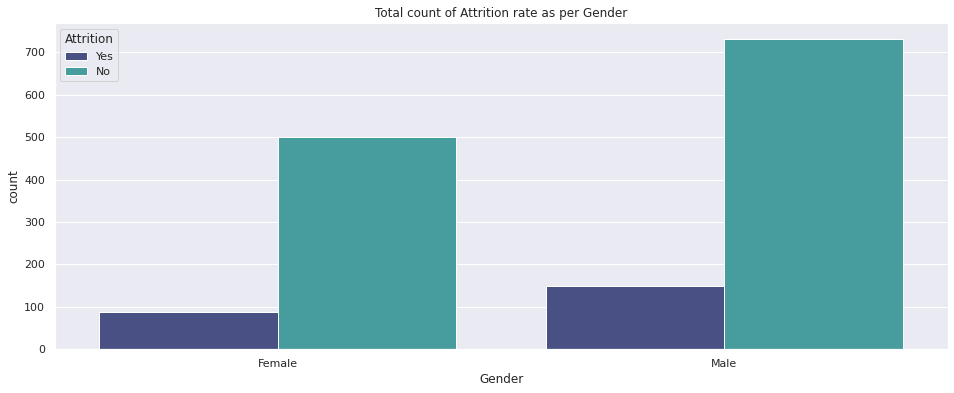

In [91]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="Attrition",data=df, palette="mako").set(title='Total count of Attrition rate as per Gender')

#### Lets now compare the amout of OverTime amongst the gender

#### We can see the Male employes work overtime more than the female employees in this scenario.

#### It could be because of the nature of work where its prefered Male to be in that zone or it could also be out of voluntary decision.

#### But if we observe only the plot for Males, the number of employees working OverTime are roughly 230 which is way less than the number of Male employees about 650 that don't work overtime

#### If we generalize Indian work force in general, this data seems ideal as overtime means variabley icreasing salary to some extent 

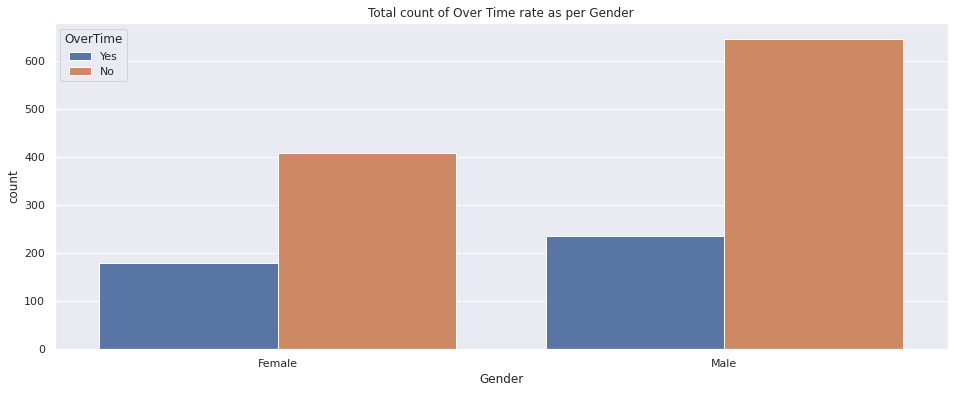

In [92]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="OverTime", data=df).set(title='Total count of Over Time rate as per Gender')

#### Lets observe if there is any relation between age of employee and years at a company

#### From the below graph we can observe that as and when the age increases, changing of jobs decreases.
#### Employee looks at a stable growth down the line and doesn't prefer switching jobs. 
#### Hence in this dataset we can observe gradual change in job seems to be between 18 to 30 years and also upto 40 years to some extent. But after that its balanced and employess may even prefer getting retired in the same company.

[Text(0.5, 1.0, 'Employee age vs years ata company')]

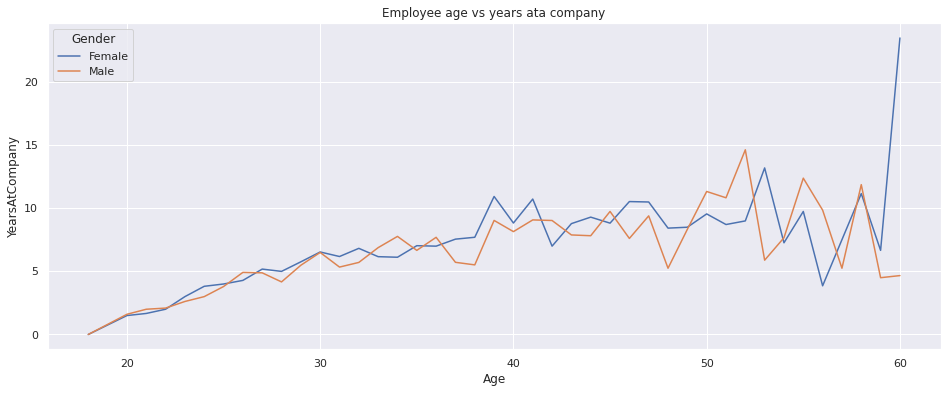

In [93]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Age", y="YearsAtCompany", hue="Gender", ci=None).set(title='Employee age vs years ata company')

#### Let's now compare the work like balance of both the genders

#### It appears majority of the employees have provided above average ( 3 in this case out of 4) rating for work like balance among both Male and Female employees.

#### Only a fraction of employees seem unhappy or dissatisfied. About 30 Female employees and about 50 Male employees seem to disagree with the scores.

#### This also shows why majority of the employees still prefer working at this company resulting in less Attrition rate

#### We can also consider this fact that not everyone prefers giving full ratings in general and hence the 2nd highest (i.e. 3) is the majority.


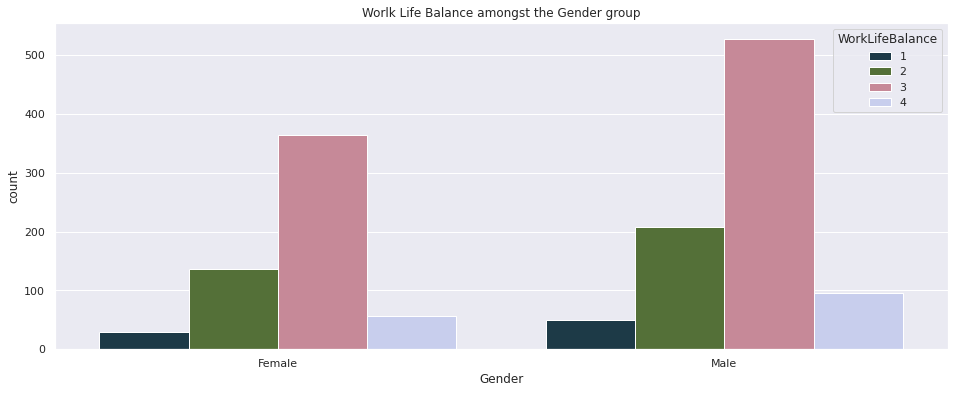

In [94]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="WorkLifeBalance", data=df, palette="cubehelix").set(title='Worlk Life Balance amongst the Gender group')

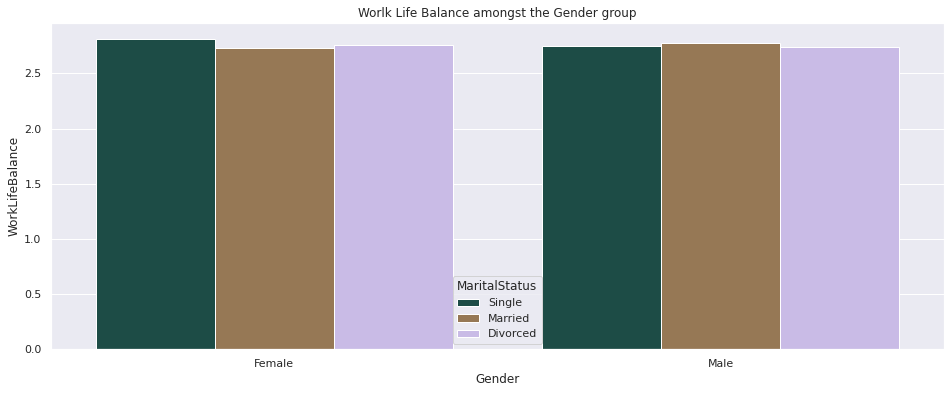

In [95]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(y="WorkLifeBalance",x="Gender",hue="MaritalStatus", data=df, palette="cubehelix", orient="v", ci=None).set(title='Worlk Life Balance amongst the Gender group')

#### Lets observe the below graph showing us the Marital status of the employees

#### We can see the majorty of the employees are "Married" among both Male and Female employees and following that, the 2nd majority are "Singles"  ( Bachelor or Spinster)  and very few emplpyee fall under "Divorced" category

#### We previously observed that majority of Male employees worked overtime and they are also Married. This could be a possible relation in this factor as in general married people have more financial responsibilities that the Singles.

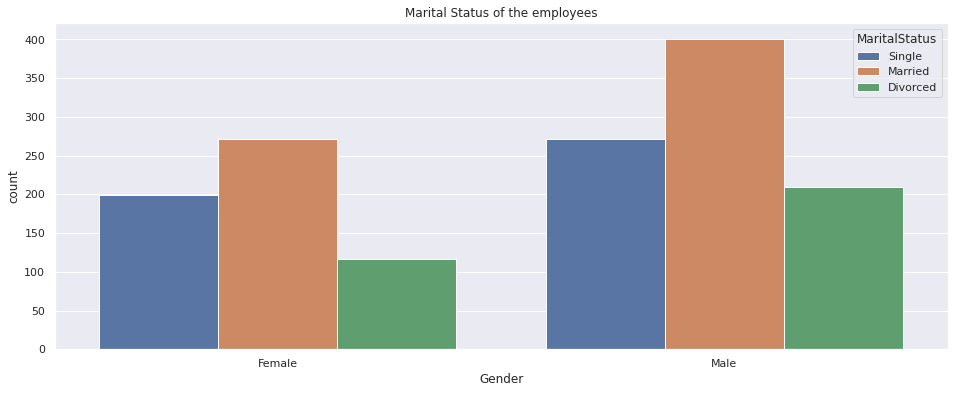

In [96]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="MaritalStatus", data=df).set(title='Marital Status of the employees')

#### The following plot shows us the relationship between one's Marital status and Attrition

#### It appears Attrition is high among the Married employees more than the emplyees belonging to other category

#### There could be a possibility that the current salary is not sufficient enough, or if the salary hike percent is not so huge.

#### Some companies have a policy of "no spouse" in same company. This could also be a reason for consideration of finding new jobs, however ther eis no enough information to provide insights on this point 

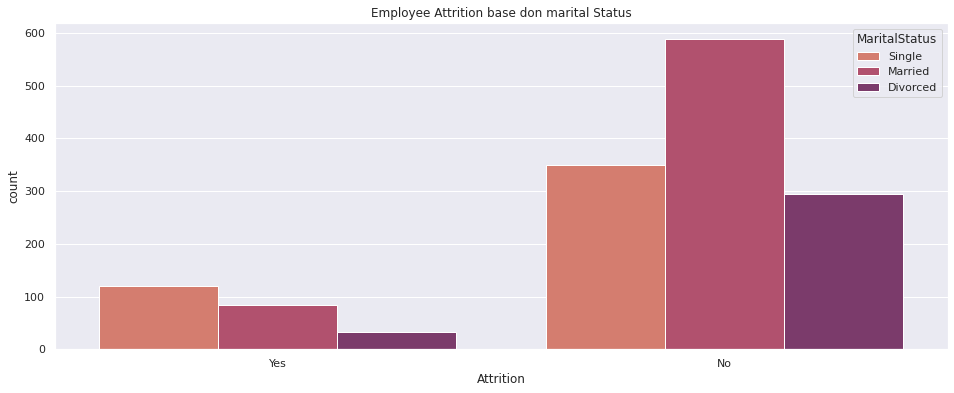

In [97]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Attrition", hue="MaritalStatus", data=df, palette="flare").set(title='Employee Attrition base don marital Status')

#### Lets observe the nature of work of the employees

#### We can see that this company may have roles that may have mandatory travel and also have roles that may require limited amout of travel.

#### Usually in Marketing / sales firms such traits are common and if at some point the employee is required to explain or convey project details may need to travel to client or customer location

#### As per the data less than 100 employees never have any travel relate work. They could be from departments like accounts, IT systems or could also be newly joined employees who are under probation or are still being trained.

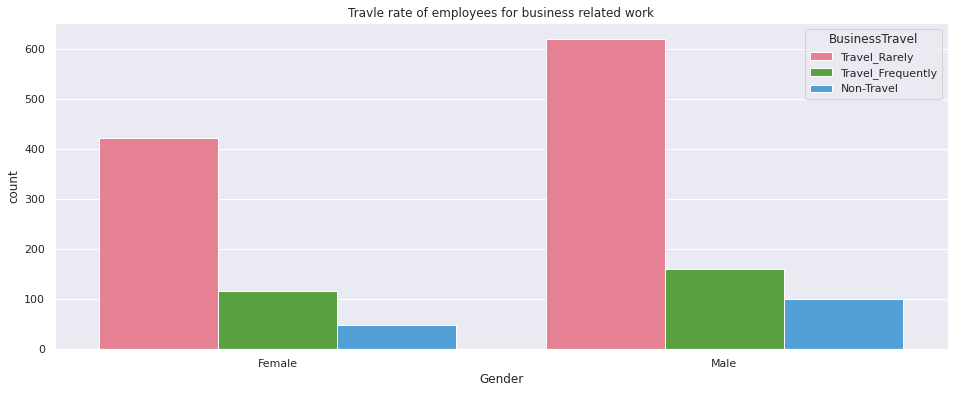

In [98]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="BusinessTravel", data=df, palette="husl").set(title='Travle rate of employees for business related work')

#### Lets observe the travel pattern of employees of different department

#### We can see majority of emplyees belonging to "Research and Development Department" travle often. 

#### We generally assume that "Sales" or "Marketing" team travel all the time, but in this scenario the numbers are less for "Sales" team.

#### Maybe the company is more into digital marketing hence more than travel "Inhouse" marketing or sales are conducted.

#### We can also consider the products could be "softwares" and not pyhsicla products to be sold hence Sales team may not travel much

#### We can also consider the possibility that the product is not ready and is still under development hence sales team has no much use of travel at the moment.

#### Since "Research and Development Department" in general own the process, who are well aware of what's the prgress in their module it may be advised for them to travel often to guage customer or client's approval


#### "Human Resources" team seldom or never travel and are majority housed at certain location permanently



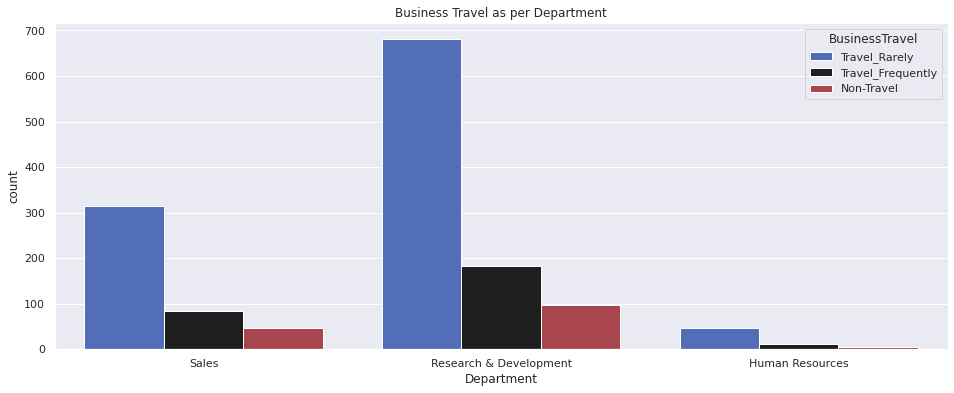

In [99]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Department", hue="BusinessTravel", data=df, palette="icefire").set(title='Business Travel as per Department')

#### Let's observe the gender distribution among the department

#### We can see there are more number of employees working in "Research and Development Department".

#### We can also see the "Male" employees are dominating in the same department more than any other department

#### This could also mean there couold be more number of technical managers, delivery managers, team leads etc with more number of Male employees than women

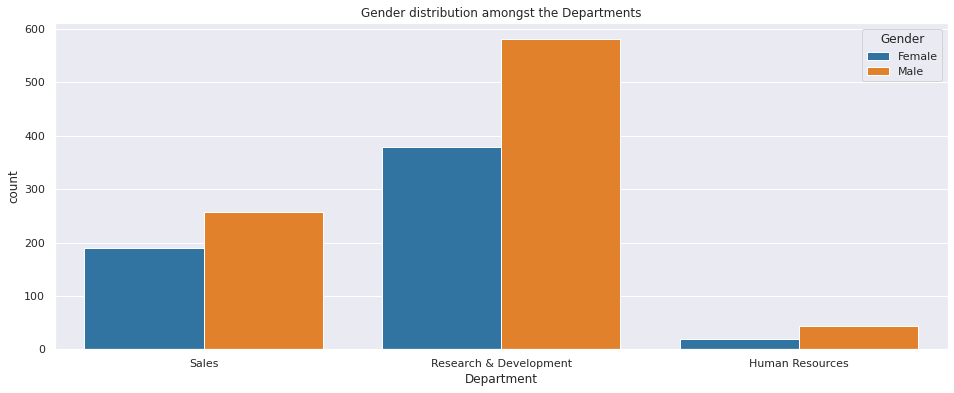

In [100]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Department", hue="Gender", data=df, palette="tab10").set(title='Gender distribution amongst the Departments')

#### Lets now observe if there is any attrition rate among specific department

#### We can see the Attrition is high in "Research and Development Department" compared to "Sales" department

#### But we can also observe that retention in "Research and Development Department" is higher than the general Attrition rate.

#### We can see not every employee is unhappy and very few employees are leaving. It could be due to continous travel, it could be due to less salary, or no additional perks etc.

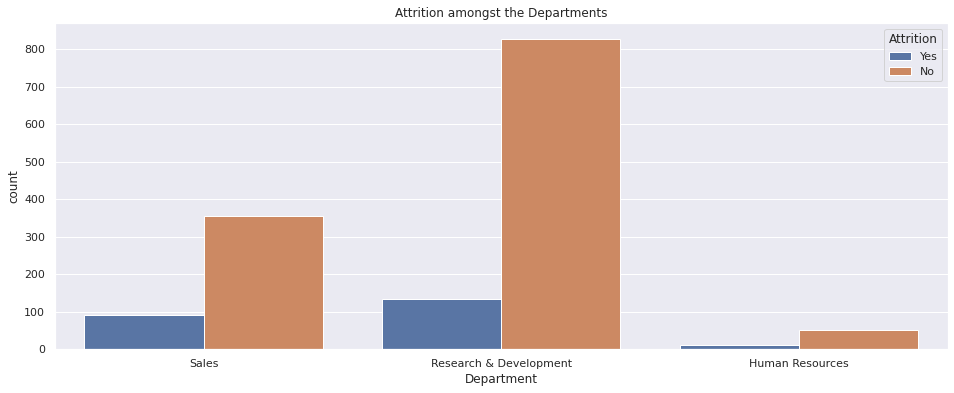

In [101]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Department", hue="Attrition", data=df).set(title='Attrition amongst the Departments')

#### Lets' observe the relation between performance rating based on their involvement

#### We can see majority of the employees have recieved rating 3 even if they were highly involved in their work and a very few employees have recieved rating 4

#### It could also mean that if a person is involved more in their roles, they may not be open to other roles, they may not be flexible or go - getters.

#### Or they could very well belong to Junior category roles across departments as freshers or entry level employees focus more involvement to get better ratings

#### The rating 4 may be given to senior employees like managers , team leads or Account managers as every company would have highest number of employees compared to the number of managers.

#### Their performance rating could also vary as they involve more in providing solutions or leading than solving technically. hence the number of employeess with thsi rating are also less.

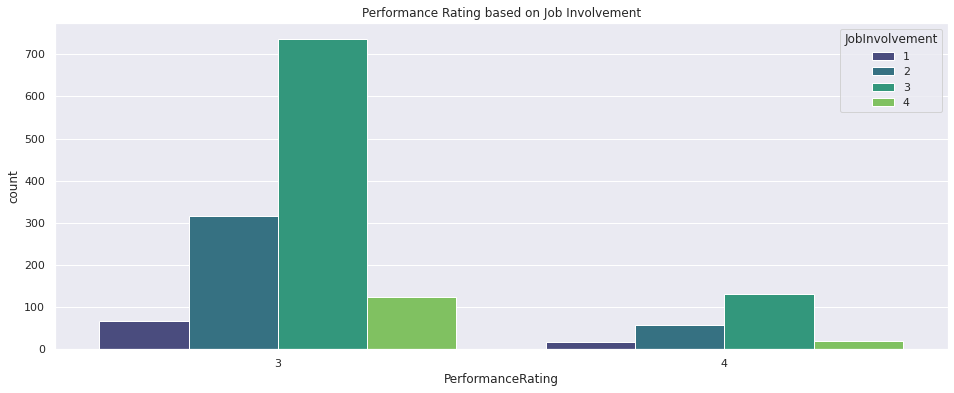

In [102]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="PerformanceRating",hue="JobInvolvement", data=df, palette="viridis").set(title='Performance Rating based on Job Involvement')


#### Let's observe the attrition rate among the level of job 

#### From this graph it is observed that attrition rate and retention rate is almost equal and shows no much understading on how job level affects once's decison to leave the company, in this scenario.

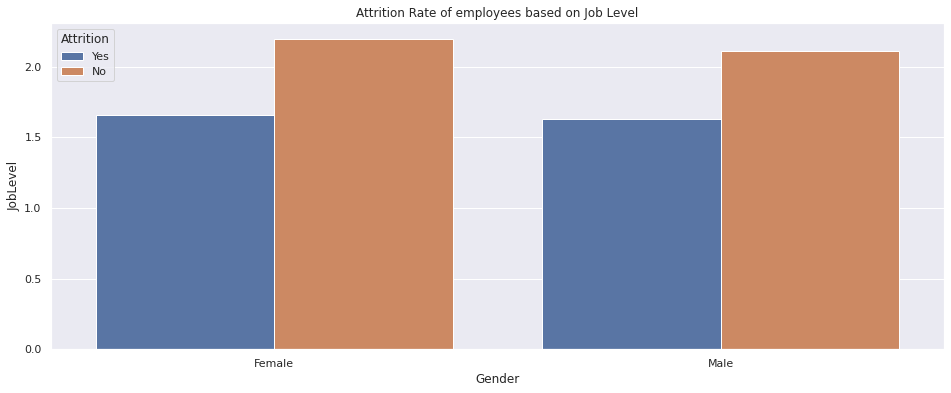

In [103]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Gender", y="JobLevel", hue="Attrition", data=df, ci=None).set(title='Attrition Rate of employees based on Job Level')

#### Lets observe if we can find the relationship between salary and the position

#### We can see "Manager" and "Research Director" are highly paid compared to other employees. They could also be belonging to specific department as salaries differ from position / role / department

#### But on the contrary, Attrition is also high among the same categories.

#### Salary may not be increased as there maybe no much innovation. Sometimes one's job title may be fancy but the work may not be that critical that would fetch high salary.

#### We can also observe that "Manager" is highy paid compared to "Sales Representative". But both the retention and attrition rate is similar for both. This may also state that not all the time salary couold be the factor. Sometimes employees also seek non - financial benefits which may be of more relevance as per individual.

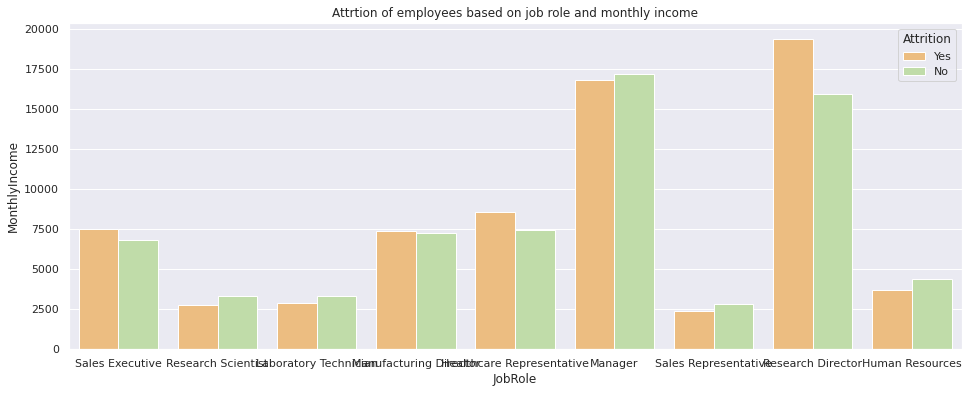

In [104]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df, ci=None, palette="Spectral").set(title='Attrtion of employees based on job role and monthly income')


#### Lets observe which gender is highly satisfied in job

#### We cna see the Male employees show higher job satisfaction than the Female employess in this scenario.

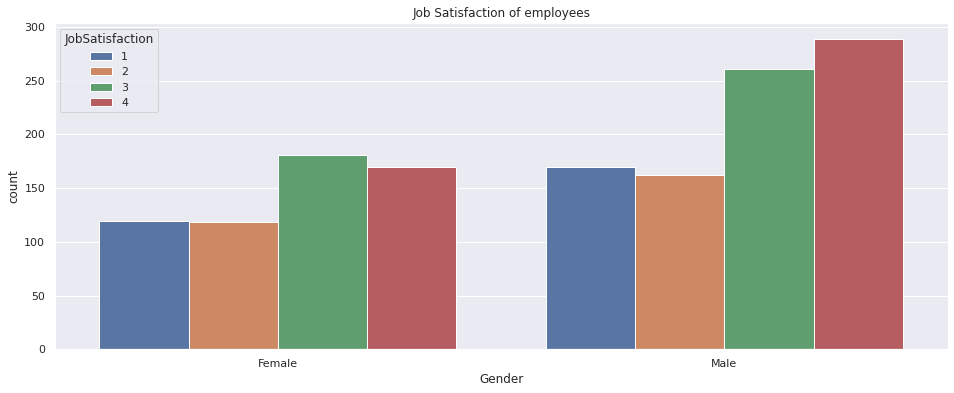

In [105]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Gender", hue="JobSatisfaction", data=df).set(title='Job Satisfaction of employees')

#### Lets observe the relationship between job satisfaction and the number of times companies changed

#### We can see from the below plot, employees who newly joined without any experience don't seem very much satisfied. It could be because they are yet to experience the factors that the experience employees may have. It also tells us in general, if it's your first company you cannot comare with other work experience unless that person joins elsewhere.

#### We can see the employees who have changed job atleast 1 time seem highly satisfied that the one's who did not change at all. It could be because when chaning jobs one always keeps in mind to get all benefits that one may not have gottenn in the first company. The first company's experience becomes your benchmark and one tries to find something better or similar but not less than that.

#### We can see the other category employees have consistent job satisfaction and we can also notice its gradually increases as and when they change companies over the years. This could also mean down the line other factors like salary, role, skills etc could be more important than just focussing on job satisfaction.

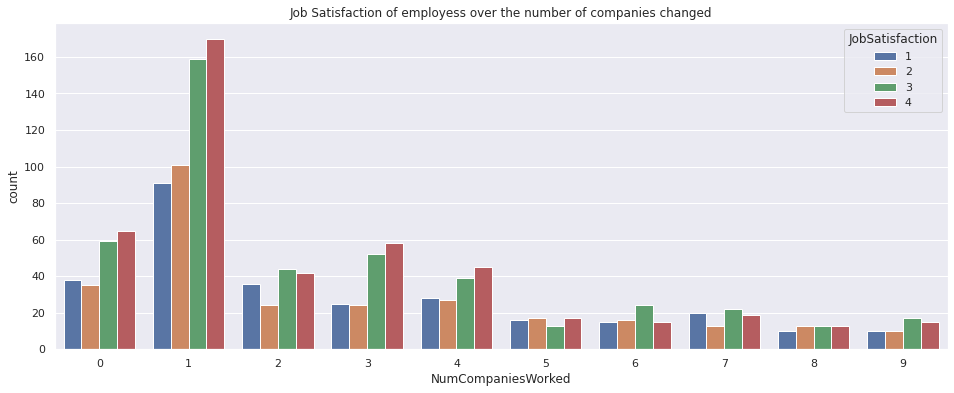

In [106]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="NumCompaniesWorked", hue="JobSatisfaction", data=df).set(title='Job Satisfaction of employess over the number of companies changed')

#### Lets observe for how long an employee sticks to their current role

#### We can see that majority of employees have worked in the same role for alomost 2 years. This also includes fresher or 0 level experience employees.

#### We can see the employees have gradually changed their roles as and when their worl experience increased whether they may have gotten promoted or may have gotten different roles to handle.

#### It's also a common fact that job enrichment and job rotation is what employee looks for these days and as and when your experince and domain knowledge increases, your urge to switch to something new increases. Hence being in the same role gradualluy decreases.

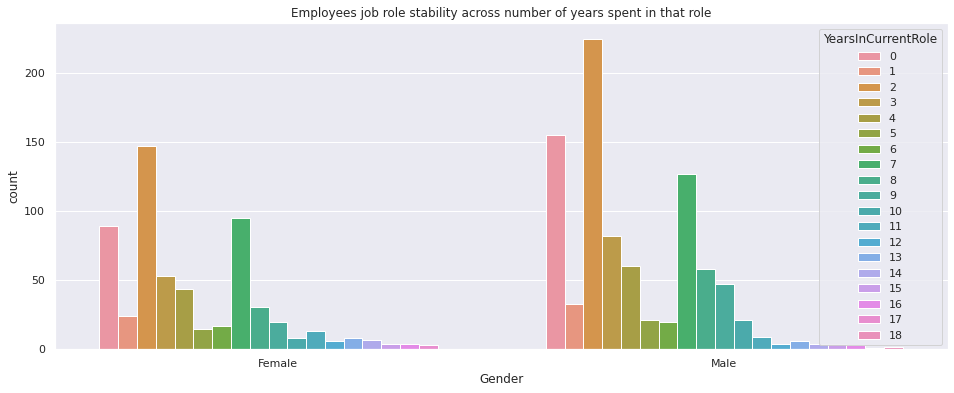

In [107]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Gender", hue="YearsInCurrentRole", data=df).set(title='Employees job role stability across number of years spent in that role')

#### Let's observe if distance of travel plays an important role in attrition

#### We can see from the below figure, the distance of travel doen't play much role in attrition for the employees living nearby.

#### We can see employees living withing 1km to 10 km have no much diference, but from 11km to 29 km there is slight change in the trend and location does seem to affect one'e choice of work / role to some extent.

#### If companies provide cabs, this number could be reduced to a greater extent as if we compare cities like Delhi and Bangalore where there is humongous traffic, commuting becomes chaotic and can influence your choice.

#### Employees living near the company could be living in PG's or rented houses nearby.

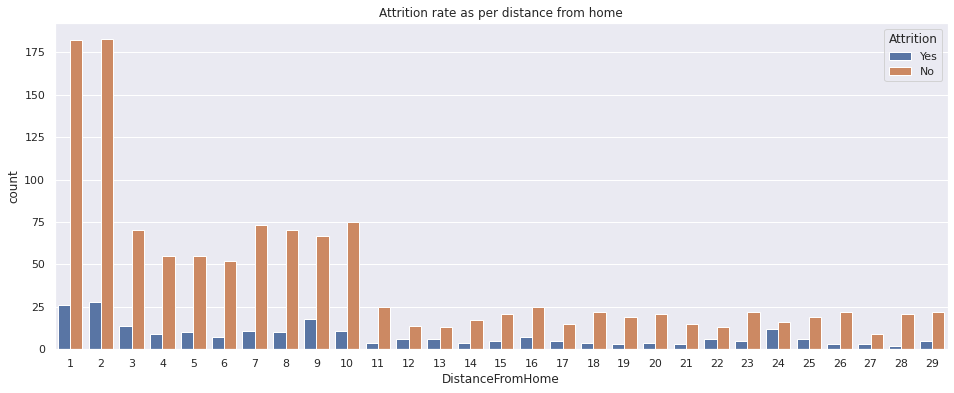

In [108]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="DistanceFromHome", hue="Attrition", data=df).set(title='Attrition rate as per distance from home')

#### Lets observe if there is any relationship between the numbe rof companies switched and the percent of salary hike.

#### We can observe that "Female" employees have recieved a maximum hike percent of about 15% and "Male" employees ahve recieved a hike of about 23%. 

#### But we can also observe that in the following scenario, it appears "Female" employees have switched more number of times than the "Male" employees. The more number of time one' switches the less the salary percent they get usually as there is no dependability on that resource.

#### We can also consider that since most of the Female employees at times don't get an opportunity due to the health break or maternity breaks taken and due to gap in employment there could be less percent of hike.

[Text(0.5, 1.0, 'Percent of salary hike in comparison to number of companies worked')]

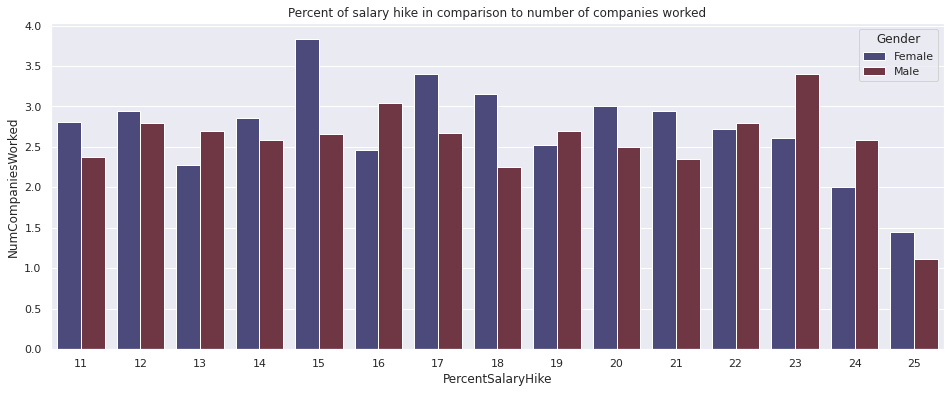

In [109]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df, x="PercentSalaryHike", y="NumCompaniesWorked", hue="Gender", palette="icefire", ci=None).set(title='Percent of salary hike in comparison to number of companies worked')

#### Lets observe if there is any relation between salary hike and total work experience.

#### We can see from the below graph the hike percent is in general within 14% to 18% and work experience alone doesn't fetch us good salary. If a person is highly expeienced but has no much work exposure the company will not pay or give higher increment.

#### In general most of the companies provide 15% or less percent of salary hike. This could be the reason why employees lookout for new jobs elsewhere where they are able to get higher salary percent.


#### We can see there is a point where it shows above 22% hike. It could be an outlier or it could be provided for employees that are exceptionally talented and bring in new set of skills to teh company.

[Text(0.5, 1.0, 'Percent of salary hike in comparison to overall work experience')]

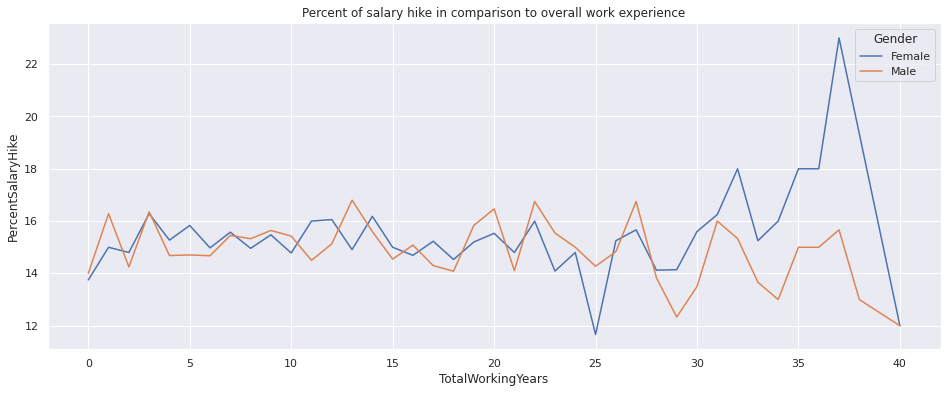

In [110]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="TotalWorkingYears", y="PercentSalaryHike", hue="Gender", ci=None).set(title='Percent of salary hike in comparison to overall work experience')

#### Lets observe if there is any relationship between employee promotion and attrition
#### From the below graph we can see Promotion doesn't seem to play much difference in one's attrition.

#### Promotion could simply be change in role title and work could be same.

#### But among the rate of attrition, it appears employees who never got promoted seem to be changing jobs. However the numbers are very less.

#### There could be less recognition given to employees and that could be one of the reasons.

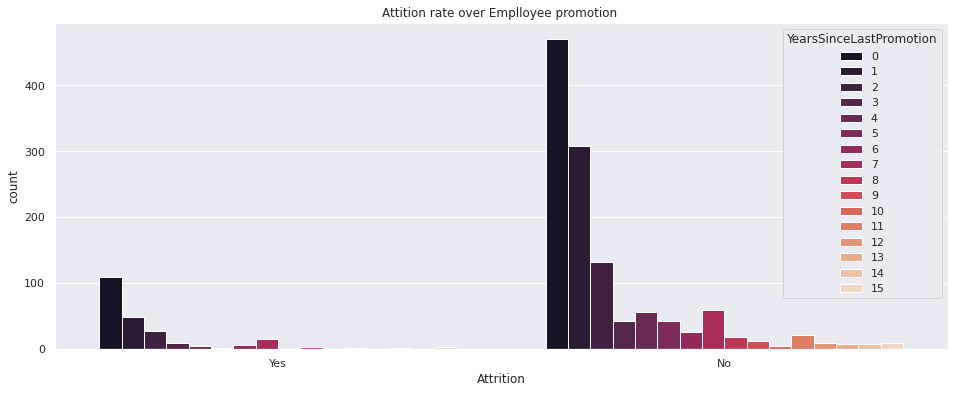

In [111]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Attrition", hue="YearsSinceLastPromotion", data=df, palette="rocket").set(title='Attition rate over Emplloyee promotion ')

#### Lets observerve if there is any relationship between work life balance and training

#### Its appears to me the worklife balance rating seems to be 3 for the employees that are trained for 2 to 3 times.

[Text(0.5, 1.0, 'Work life balance vs training time taken')]

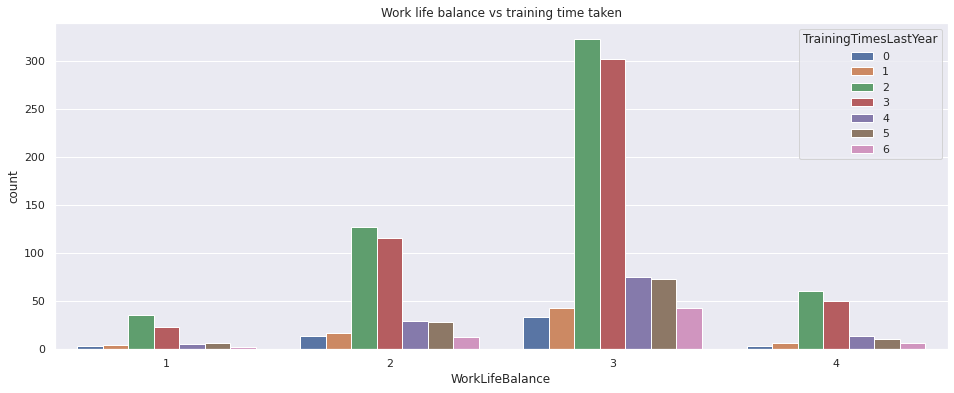

In [112]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x="WorkLifeBalance", hue="TrainingTimesLastYear").set(title='Work life balance vs training time taken')

#### From the below plot we can observe that there is no much difference in training time spent and attrition.

#### Also it appears an employee being trained for atleast 2 to 3 times are higher than the other set of employees.

#### It also shows very few people left the company hence there should be no major impact in training costs involved


[Text(0.5, 1.0, 'Training time spent vs attrition')]

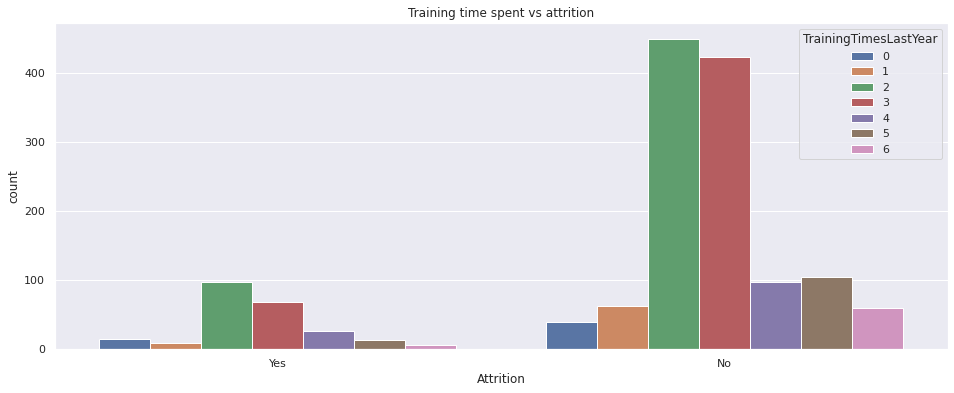

In [113]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x="Attrition", hue="TrainingTimesLastYear").set(title='Training time spent vs attrition')

#### Lets obseve if there is any relation between job involvement and employment satisfaction

#### Environment satisfaction seems high among the employees with job involvement rating 3.

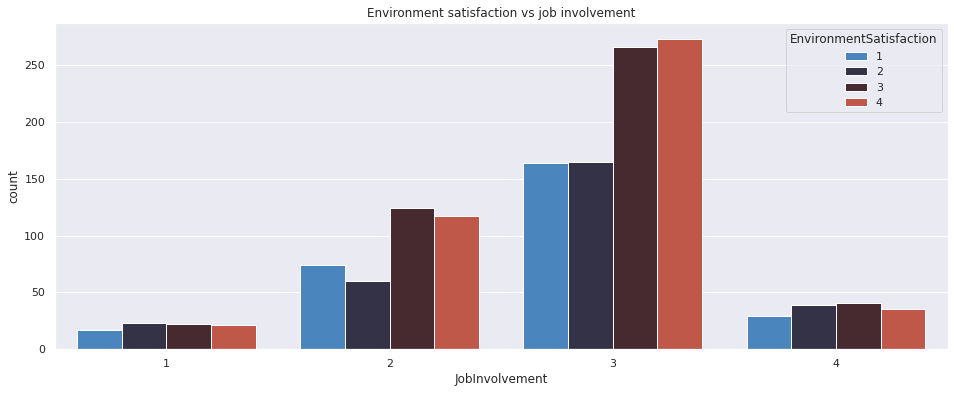

In [114]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(hue="EnvironmentSatisfaction", x="JobInvolvement", data=df, palette="icefire").set(title='Environment satisfaction vs job involvement')

#### Lets observe if there is any relationshiep between stock optins and job role

#### We can see very few employees are eligible for stocks of maximum 3 and majority of employess have no or 0 stocks.

#### We can also see "Laboratory Technician" has more preference for keeping stocks followed by "Research Scientist" and "Sales Executive"

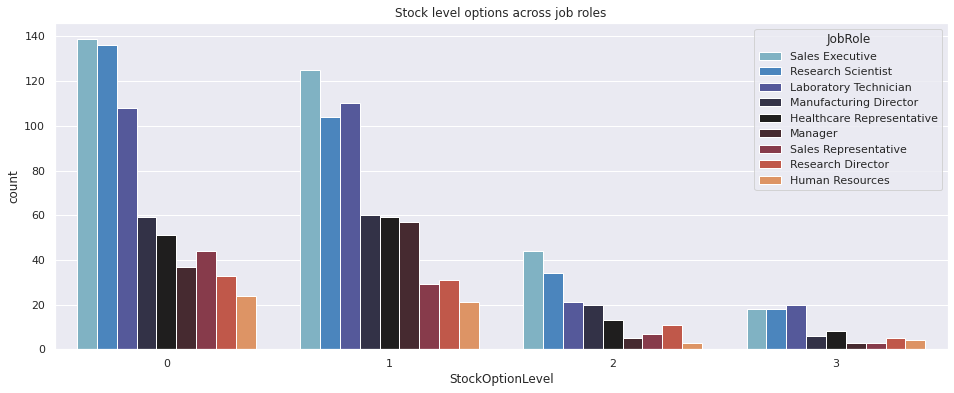

In [115]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(hue="JobRole", x="StockOptionLevel", data=df, palette="icefire").set(title='Stock level options across job roles')

# Preprocessing

### Encoding the dataset
##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### Also because, we have more than 9 columns, going with one hot encoding is not an ideal option.
##### The columns 'Attrition', 'BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18' and 'OverTime' would be converted as follows.

In [116]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [2]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [3]:
df_new1 = lab_enc.fit_transform(df["Attrition"])
df_new2 = lab_enc.fit_transform(df["BusinessTravel"])
df_new3 = lab_enc.fit_transform(df["Department"])
df_new4 = lab_enc.fit_transform(df["EducationField"])
df_new5 = lab_enc.fit_transform(df["Gender"])
df_new6 = lab_enc.fit_transform(df["JobRole"])
df_new7 = lab_enc.fit_transform(df["MaritalStatus"])
df_new8 = lab_enc.fit_transform(df["Over18"])
df_new9 = lab_enc.fit_transform(df["OverTime"])

In [4]:
df["Attrition"] = df_new1
df["BusinessTravel"] = df_new2
df["Department"] = df_new3
df["EducationField"] = df_new4
df["Gender"] = df_new5
df["JobRole"] = df_new6
df["MaritalStatus"] = df_new7
df["Over18"] = df_new8
df["OverTime"] = df_new9

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [121]:
df.shape

(1470, 35)

# Distribution of all the columns in the dataset


### All the features seem to normally distributed. Since we have multiple features, lets try to identify the distribution

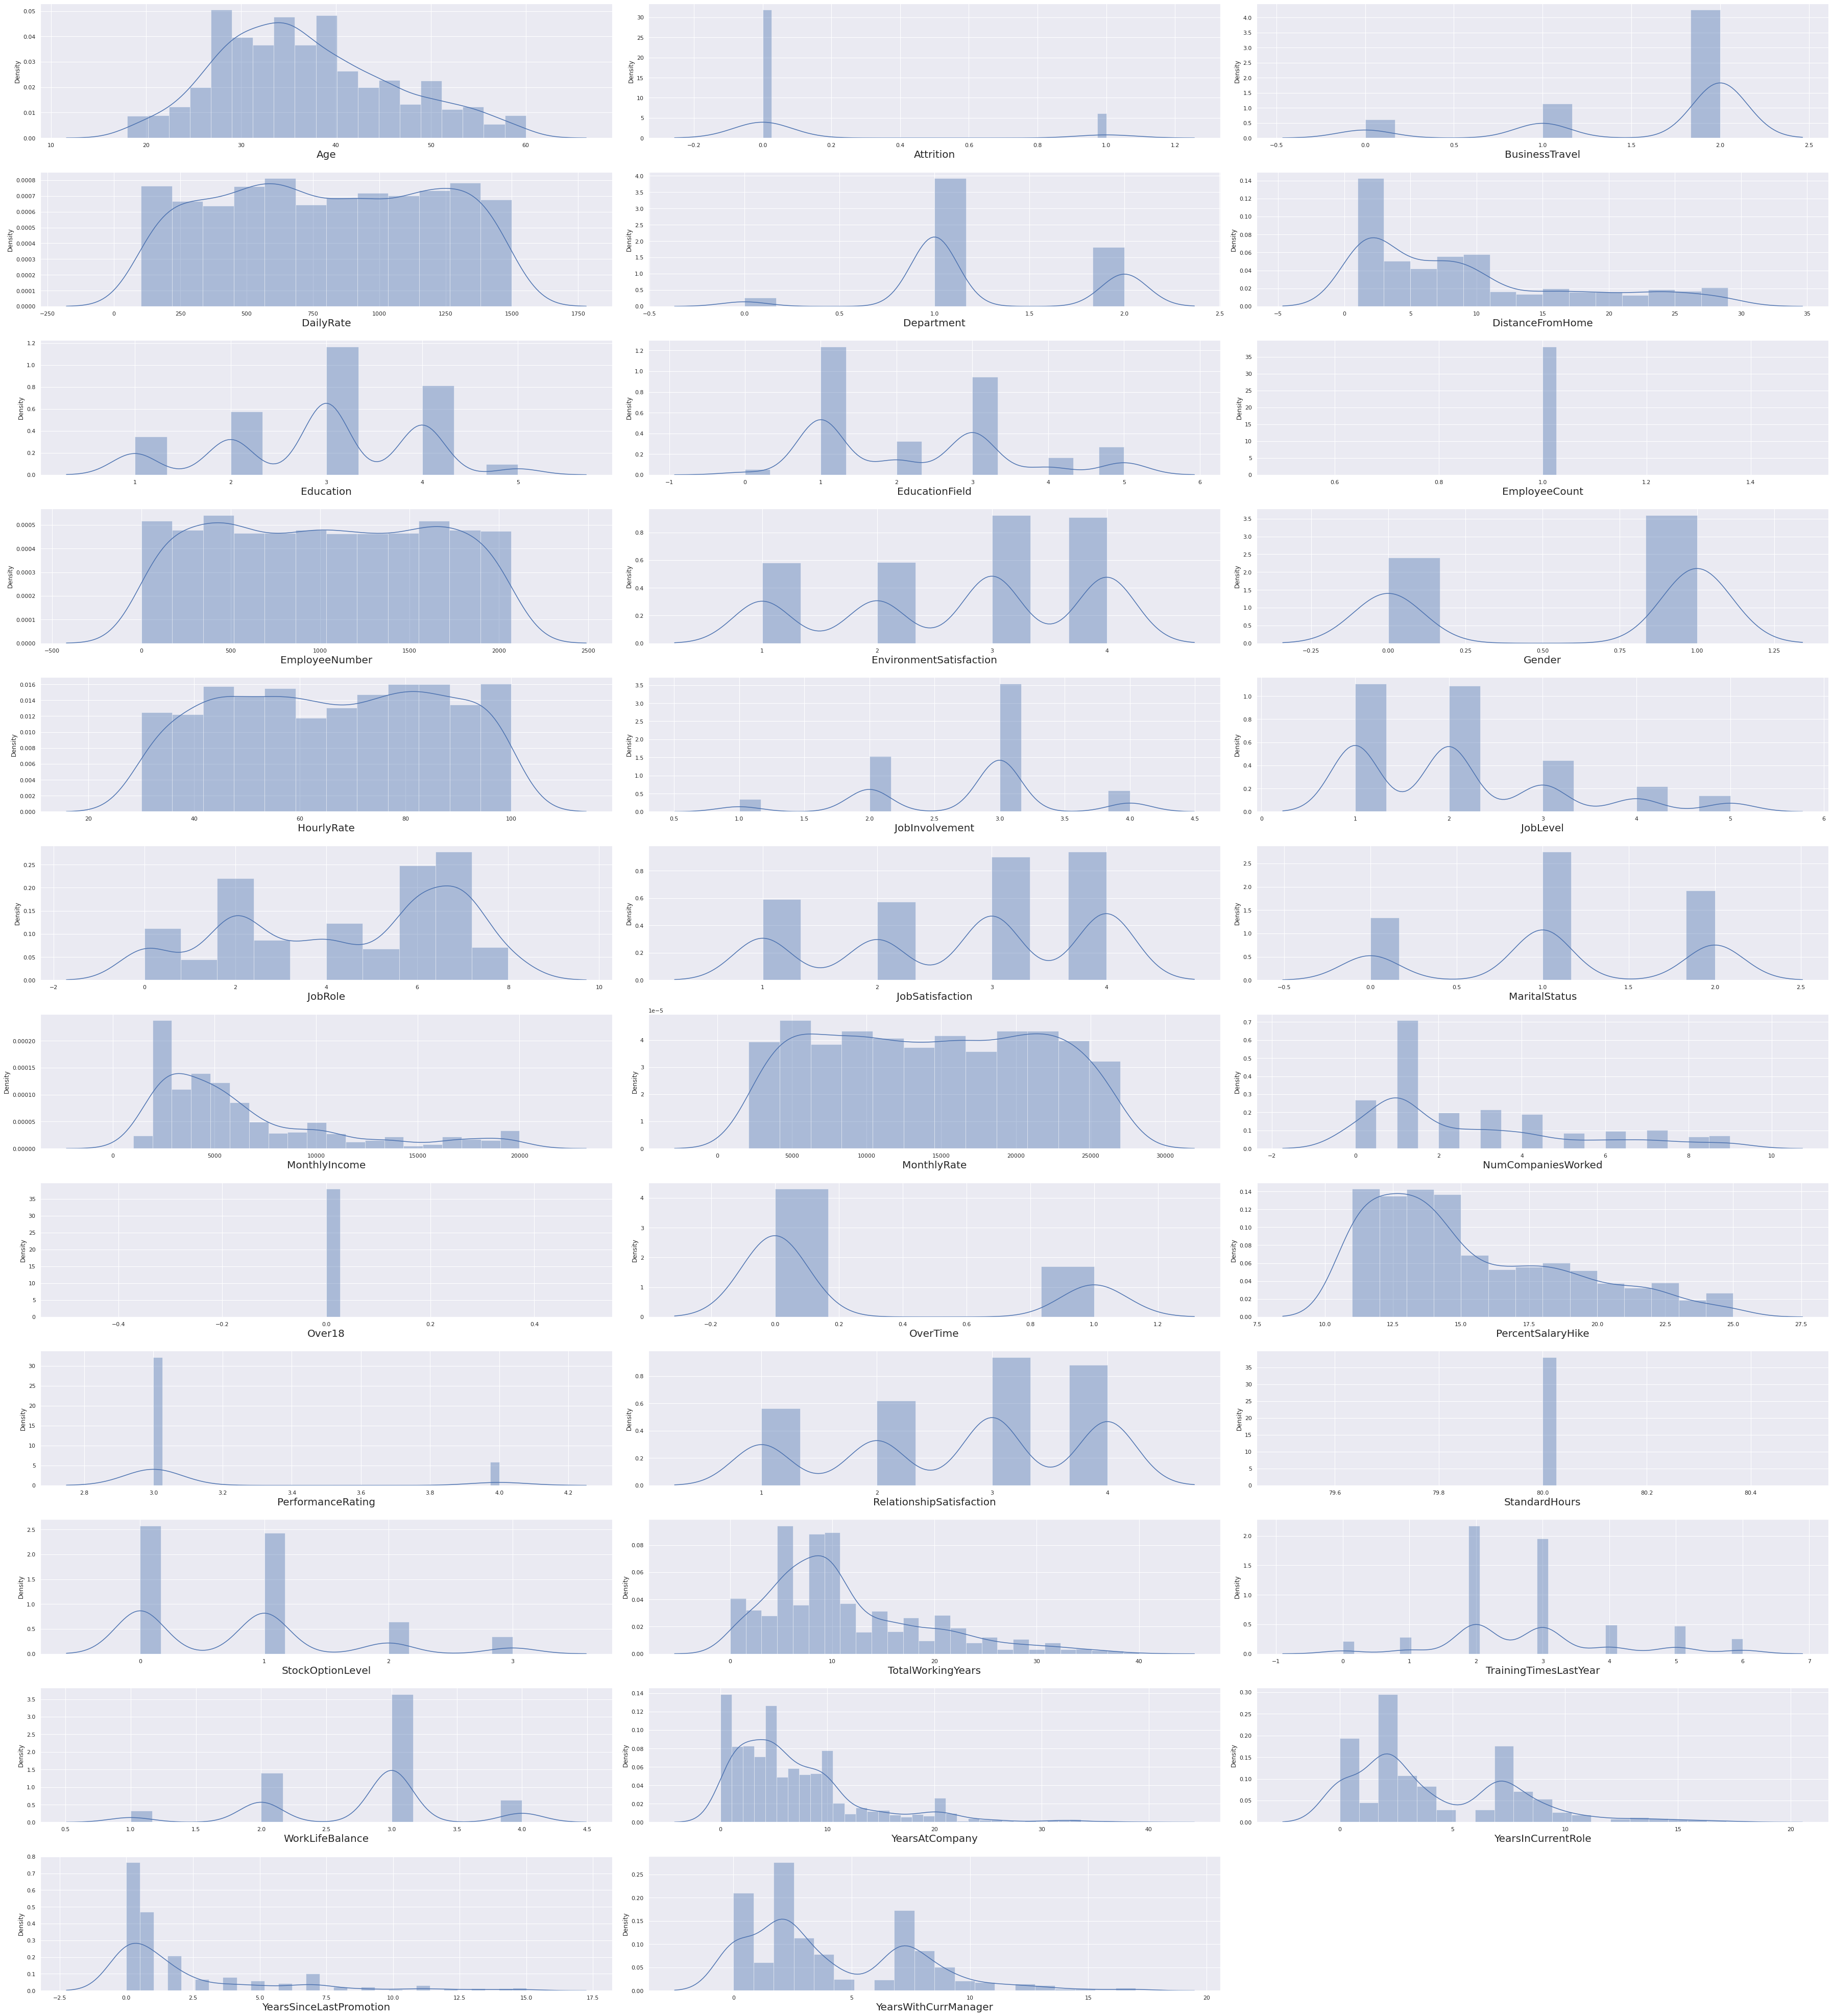

In [122]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=35:
        ax = plt.subplot(12,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### I have considered columns 'DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate' and 'PercentSalaryHike' as these are the only continous data columns.

### The remaining numerical columns are all in general categorical in nature and applying this method makes no sense.

In [123]:
from scipy.stats import zscore

z_score = zscore(df[['DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case the data appears to be normally distributed hence no values are reduced even after applying z-score

In [124]:
# Percentage data loss:

loss_percent = (1470-1470)/30*100
print(loss_percent)

0.0


## Correlation of the features with the dependent variable "W"

#### The "MonthlyIncome" seems to have a higher correlation

In [125]:

corr_matrix = df.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


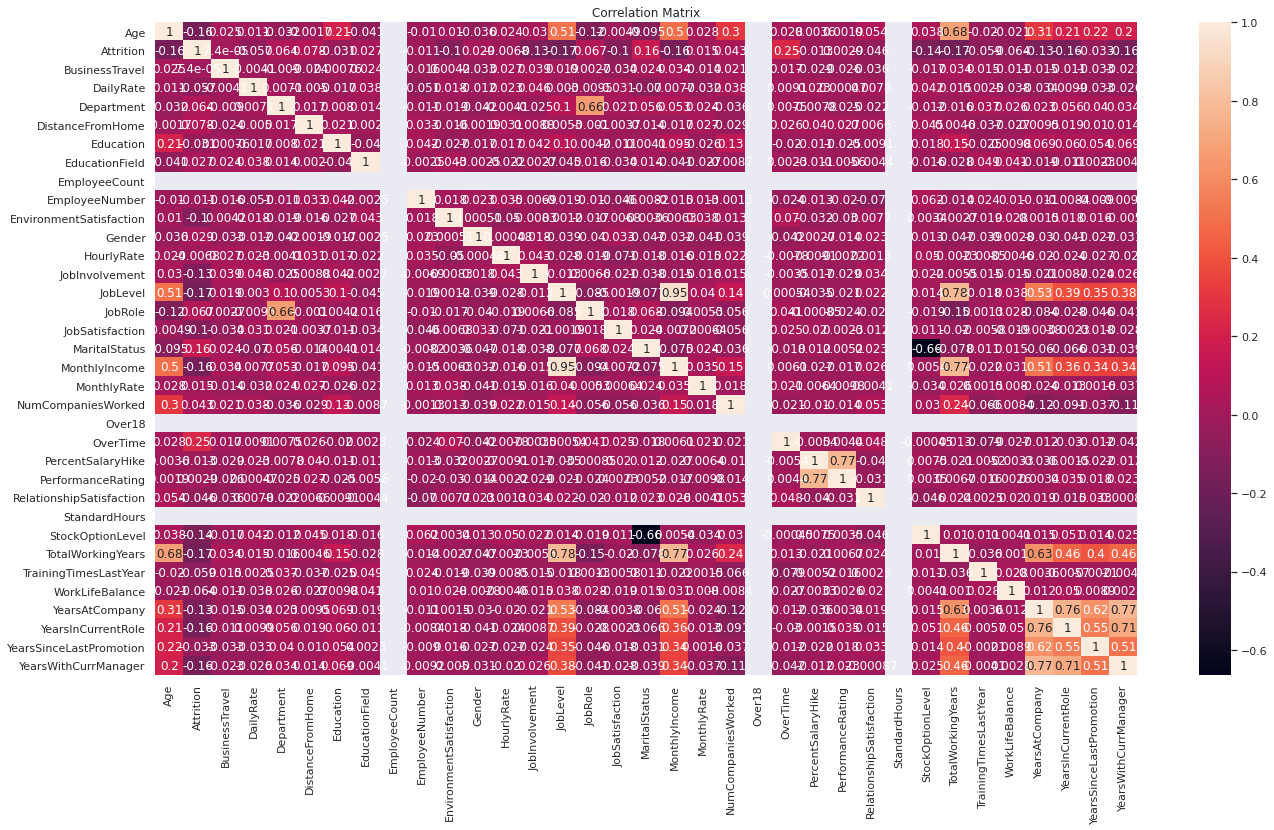

In [126]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [6]:
x = df.drop(columns = ["Attrition"], axis=1)
y = df["Attrition"]

### Check for skewness of data

In [128]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears the numerical column "MonthlyIncome" has high VIF, hence i will drop the column

##### [ by dropping this coulmn the model imporved well]

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,NaN,EmployeeCount
8,1.022699,EmployeeNumber
9,1.018022,EnvironmentSatisfaction


#### Dropping "MonthlyIncome" from the x dataset

In [8]:
x.drop(['MonthlyIncome'], axis = 1, inplace=True)

#### These columns are adding no information to thye model building

###### EmployeeCount - just the count of individual employee
###### EmployeeNumber - It's as same as a register number 
###### Over18 - All employees are over 18, no minor gets a job at a company
###### StandardHours - There is no relation with the work hours given here

#### Hence these columns are also dropped

In [9]:
x.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace=True)

# Finding variance inflation factor after dropping columns

#### The VIF is reduced and multi-collinearity seems to be removed

In [133]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.049359,Age
1,1.014540,BusinessTravel
2,1.023801,DailyRate
3,1.904403,Department
4,1.012331,DistanceFromHome
5,1.063377,Education
6,1.016208,EducationField
7,1.016837,EnvironmentSatisfaction
8,1.019044,Gender
9,1.019924,HourlyRate


# Check if the dataset is over sampling or under sampling

In [134]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# I will proceed with SMOTE technique for Over Sampling of dataset
### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset because, the accuracy of the model after balancing the dataset was much better than the unbalanced dataset.

In [10]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Balanced dataset after SMOTE

In [11]:
y_over.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

# split the dataset into train and test data set

#### I have chosed 200 random state and 30% of data is divided in text dataset

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 6 ML models in thsi scenario

### 1) LogisticRegression

In [138]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7256756756756757
[[271  70]
 [133 266]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       341
           1       0.79      0.67      0.72       399

    accuracy                           0.73       740
   macro avg       0.73      0.73      0.73       740
weighted avg       0.74      0.73      0.73       740



### 2) DecisionTreeClassifier 

In [139]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7797297297297298
[[267  74]
 [ 89 310]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       341
           1       0.81      0.78      0.79       399

    accuracy                           0.78       740
   macro avg       0.78      0.78      0.78       740
weighted avg       0.78      0.78      0.78       740



### 3) RandomForestClassifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8959459459459459
[[322  19]
 [ 58 341]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       341
           1       0.95      0.85      0.90       399

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



### 4) GradientBoostingClassifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8837837837837837
[[311  30]
 [ 56 343]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       341
           1       0.92      0.86      0.89       399

    accuracy                           0.88       740
   macro avg       0.88      0.89      0.88       740
weighted avg       0.89      0.88      0.88       740



### 5) AdaBoostClassifier

In [142]:
from sklearn.ensemble import AdaBoostClassifier

ad_class = AdaBoostClassifier()
ad_class.fit(x_train,y_train)

y_pred = ad_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8554054054054054
[[298  43]
 [ 64 335]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       341
           1       0.89      0.84      0.86       399

    accuracy                           0.86       740
   macro avg       0.85      0.86      0.86       740
weighted avg       0.86      0.86      0.86       740



### 6) ExtraTreesClassifier

In [143]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9094594594594595
[[323  18]
 [ 49 350]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       341
           1       0.95      0.88      0.91       399

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



# Cross validation to check if its overfitting

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
scr = cross_val_score(log_reg, x, y, cv=5)
print("Cross Validation score of LogisticRegression model is:", scr.mean())

Cross Validation score of LogisticRegression model is: 0.8408163265306122


In [146]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.773469387755102


In [147]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.8544217687074831


In [148]:
scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

Cross Validation score of GradientBoostingClassifier model is: 0.8673469387755102


In [149]:
scr = cross_val_score(ad_class, x, y, cv=5)
print("Cross Validation score of AdaBoostClassifier model is:", scr.mean())

Cross Validation score of AdaBoostClassifier model is: 0.8748299319727891


In [150]:
scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.8564625850340135


# Selecting the best ML model for this dataset

### From the above algorithms LogisticRegression and AdaBoostClassifier have lowest difference in general.

### But we should proceed with LogisticRegression as the difference is lower compared to other models for this dataset in this scenario

### Also I can consider LogisticRegressionn as the traget columns "Attrition" has only 2 classes i.e. "Yes" and "No"


| Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- |---|
| LogisticRegression | 0.725675675675675 | 0.840816326530612 | -0.115140650854937 |
| DecisionTreeClassifier | 0.779729729729729 | 0.773469387755102 | 0.00626034197462699 |
| RandomForestClassifier | 0.895945945945945 | 0.854421768707483 | 0.041524177238462 |
| GradientBoostingClassifier | 0.883783783783783 | 0.86734693877551 | 0.016436845008273 |
| AdaBoostClassifier | 0.855405405405405 | 0.874829931972789 | -0.019424526567384 |
| ExtraTreesClassifier | 0.909459459459459 | 0.856462585034013 | 0.0529968744254461 |





# ROC AUC score for all the algorithms

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [152]:
#ROC AUC score for LogisticRegression

roc_auc_score(y_test, log_reg.predict(x_test))

0.7306940371456498

In [153]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.7799667791178827

In [154]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.8994590582026916

In [155]:
#ROC AUC score for GradientBoostingClassifier

roc_auc_score(y_test, gb_class.predict(x_test))

0.8858362916087874

In [156]:
#ROC AUC score for AdaBoostClassifier

roc_auc_score(y_test, ad_class.predict(x_test))

0.8567496453744332

In [157]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.9122035293512374

# ROC AUC score plots

#### We can see the ROC curve shows more for ExtraTreesClassifier. 

#### But we will get its checked by referring to the difference of model accuracy and cross validation score

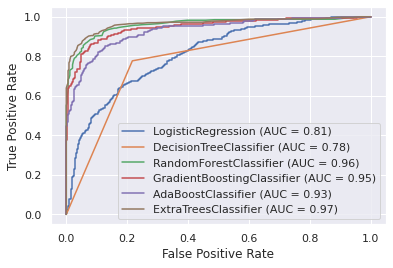

In [158]:
disp = plot_roc_curve(log_reg, x_test, y_test)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(gb_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ad_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)\

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Hyper Parameter Tuning

### Let us try to tune the proposed model (LogisticRegression) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [168]:
parameters = {"penalty":["l1", "l2", "elasticnet", "none"],
              "tol":[1e-4, 1e-2, 1e-3, 1e-1],
              "intercept_scaling":[1, 2, 3, 4, 5],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class":["auto", "ovr", "multinomial"],
              "max_iter":[50, 70, 100, 120, 130],
              "intercept_scaling":[1, 2, 3, 4, 5]
              }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [169]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [170]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'intercept_scaling': [1, 2, 3, 4, 5],
                         'max_iter': [50, 70, 100, 120, 130],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
     

In [171]:
GCV.best_params_

{'intercept_scaling': 5,
 'max_iter': 70,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was approximately 72.56 % earlier and post Hyper Parameter tuning its now approximately 84.72 % better 

In [173]:
mod_log_reg = LogisticRegression(intercept_scaling= 5, max_iter= 70, multi_class="ovr", penalty= "l1", solver= "liblinear", tol =0.001)

mod_log_reg.fit(x_train,y_train)
pred = mod_log_reg.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.72972972972973


# Saving the model (using joblib)

In [175]:
# Saving the model

import joblib
joblib.dump(mod_log_reg,"HR_Analytics.pkl")

['HR_Analytics.pkl']

# Loading the saved model

In [176]:
model = joblib.load("HR_Analytics.pkl")

In [177]:
prediction = model.predict(x_test)

In [178]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,1
1,1
2,1
3,1
4,0
...,...
735,0
736,1
737,0
738,1
